In [7]:
# Mount Google Drive to access files using their paths relative to the "/content/drive" directory.
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

**STEP 1 : Load the dataset into a dataframe and analyze the data**

In [9]:
#specify path of csv file relative to "/content/drive" directory.
file_path = '/content/drive/My Drive/Colab Notebooks/Cancer_Data.csv'
df = pd.read_csv(file_path)

In [14]:
df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


In [11]:
df.shape

(569, 33)

In [13]:
# Print the column names
print(df.columns)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


In [20]:
# statistics computed for each column in the df
summary_stats = df.describe()
print(summary_stats)

                 id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813     

In [15]:
# see the unique values in diagnosis column
unique_diagnosis = df['diagnosis'].unique()
print(unique_diagnosis)


['M' 'B']


Looks like diagnosis is our target column. Lets assign X and y accordingly

In [19]:
# Separate the data and target variables
X = df.drop(columns=['id', 'diagnosis', 'Unnamed: 32'])
y = df['diagnosis']

print("Data:")
print(X.shape)
print(X.head())
print()
print("Target:")
print(y.shape)
print(y.head())

Data:
(569, 30)
   radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   fractal_dimension_mean  ...  radius_worst  texture_worst  perimeter_worst

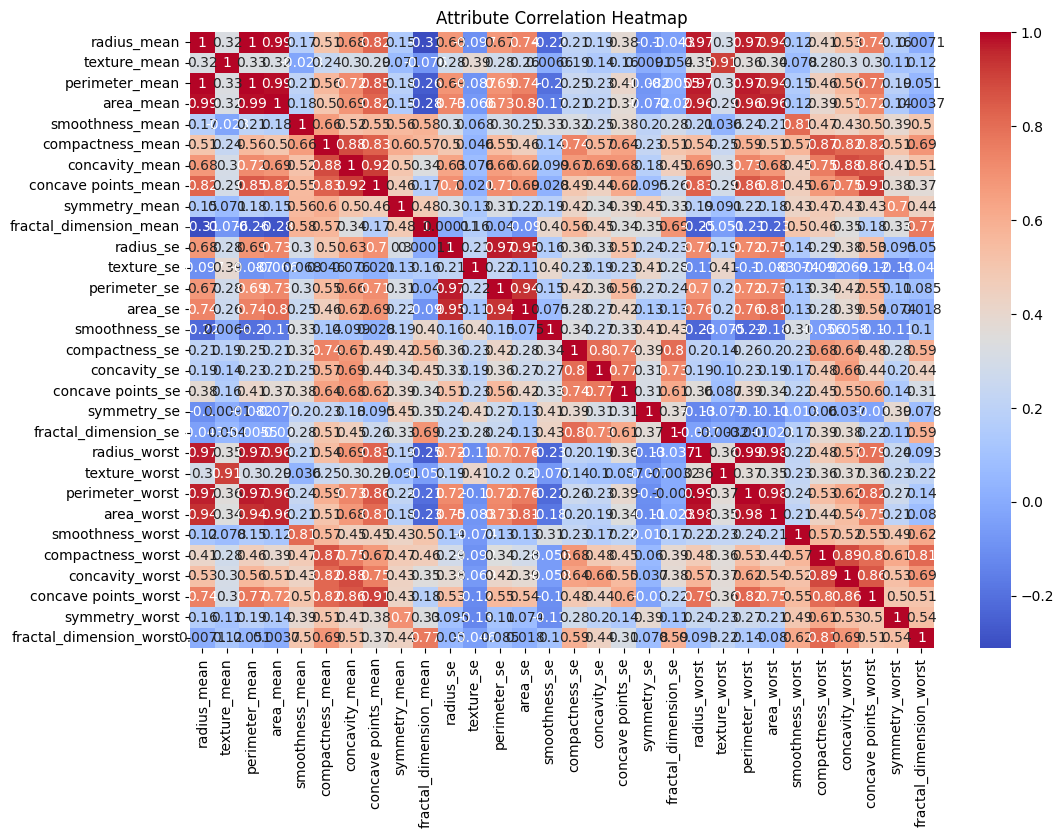

In [25]:
# Create a heatmap of the attribute correlations
# High correlation (+ve or -ve) by bright colors, low correlation by dull colors.
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.heatmap(X.corr(), cmap='coolwarm', annot=True)
plt.title('Attribute Correlation Heatmap')
plt.show()


**STEP 2: Preprocessing**

In [31]:
# Perform label encoding on the 'diagnosis' target variable
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
print(y_encoded)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1
 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0
 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 1 0 0 1 

In [32]:
# change the dataframe's diagnosis column
df['diagnosis'] = y_encoded

In [38]:
df.head(2)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN


In [33]:
# Standardizing everything to have a common ground so that magnitude of some feature's value doesn't affect the PCA.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [40]:
# Scaling of the whole dataframe.
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
# Define new X and y
X_train = df_scaled.drop(columns=['id', 'diagnosis', 'Unnamed: 32'])              #drop 2 other columns as well
y_train = df_scaled['diagnosis']
print("shape of new input X",X_train.shape)
print("shape of new output Y",y_train.shape)

shape of new input X (569, 30)
shape of new output Y (569,)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1047: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1052: RuntimeWarning: invalid value encountered in true_divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1072: RuntimeWarning: invalid value encountered in true_divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [83]:
# Assign different colors to the data points based on the 'diagnosis' column
# Used to visually distinguish 2 different categories in that column
colors = ['blue' if t == 0 else 'red' for t in df_scaled['diagnosis'].map({0: 'B', 1: 'M'})]




**STEP 3:CoVariance Matrix Calculation**

In [41]:
# covariance matrix will be 30*30 since X=(569,30). [each 30 features has covariance with each 30. so 30*30 matrix]

covariance_matrix = np.cov(X_train, rowvar=False)                      # attribute variable = column
print("Covariance matrix shape:", covariance_matrix.shape)
print(covariance_matrix)

Covariance matrix shape: (30, 30)
[[ 1.00176056e+00  3.24351929e-01  9.99612069e-01  9.89095475e-01
   1.70881506e-01  5.07014640e-01  6.77955036e-01  8.23976636e-01
   1.48001350e-01 -3.12179472e-01  6.80285970e-01 -9.74887767e-02
   6.75358538e-01  7.37159198e-01 -2.22992026e-01  2.06362656e-01
   1.94545531e-01  3.76831225e-01 -1.04504545e-01 -4.27163418e-02
   9.71245907e-01  2.97530545e-01  9.66835698e-01  9.42739295e-01
   1.19826732e-01  4.14190751e-01  5.27839123e-01  7.45524434e-01
   1.64241985e-01  7.07832563e-03]
 [ 3.24351929e-01  1.00176056e+00  3.30113223e-01  3.21650988e-01
  -2.34296930e-02  2.37118951e-01  3.02950254e-01  2.93980713e-01
   7.15266864e-02 -7.65717560e-02  2.76354360e-01  3.87037830e-01
   2.82169018e-01  2.60302460e-01  6.62542133e-03  1.92312595e-01
   1.43545353e-01  1.64139495e-01  9.14323671e-03  5.45533955e-02
   3.53193674e-01  9.13650301e-01  3.58669926e-01  3.44150782e-01
   7.76398084e-02  2.78318729e-01  3.01555198e-01  2.95835766e-01
   1.05

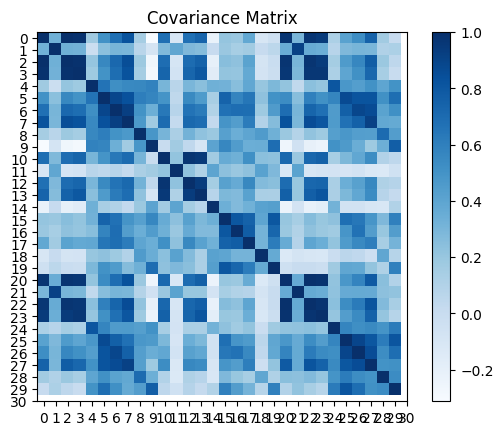

In [42]:
# Visualize covariance matrix
plt.imshow(covariance_matrix, cmap='Blues', interpolation='nearest')   # nearest = sharp interpolation of color values on pixel= sharp edges
plt.colorbar()
plt.title('Covariance Matrix')
plt.xticks(np.arange(31), np.arange(31))   #tick labels on axes changed from 0 to 30
plt.yticks(np.arange(31), np.arange(31))
plt.show()

**STEP 4: Eigen vectors/values calculation**

In [43]:
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
print("shape of eigenvalue:",eigenvalues.shape)
print("shape of eigen vectors:",eigenvectors.shape)
print("eigen values are",eigenvalues)
print("eigen vectors are",eigenvectors)

shape of eigenvalue: (30,)
shape of eigen vectors: (30, 30)
eigen values are [1.33049908e+01 5.70137460e+00 2.82291016e+00 1.98412752e+00
 1.65163324e+00 1.20948224e+00 6.76408882e-01 4.77456255e-01
 4.17628782e-01 3.51310875e-01 2.94433153e-01 2.61621161e-01
 2.41782421e-01 1.57286149e-01 9.43006956e-02 8.00034045e-02
 5.95036135e-02 5.27114222e-02 4.95647002e-02 1.33279057e-04
 7.50121413e-04 1.59213600e-03 6.91261258e-03 8.19203712e-03
 1.55085271e-02 1.80867940e-02 2.43836914e-02 2.74877113e-02
 3.12142606e-02 3.00256631e-02]
eigen vectors are [[ 2.18902444e-01 -2.33857132e-01 -8.53124284e-03  4.14089623e-02
  -3.77863538e-02  1.87407904e-02  1.24088340e-01  7.45229622e-03
  -2.23109764e-01  9.54864432e-02  4.14714866e-02  5.10674568e-02
   1.19672116e-02 -5.95061348e-02  5.11187749e-02 -1.50583883e-01
   2.02924255e-01  1.46712338e-01 -2.25384659e-01 -7.02414091e-01
   2.11460455e-01 -2.11194013e-01 -1.31526670e-01  1.29476396e-01
   1.92264989e-02 -1.82579441e-01  9.85526942e-02 

**STEP 5: See the variance explained by each eigen values.**

In [44]:
# Element wise array division to obtain a new array
# proportion_of_variance array provides insights into relative importance of each PC in capturing the overall variance in the dataset
proportion_of_variance = eigenvalues/sum(eigenvalues)
proportion_of_variance

array([4.42720256e-01, 1.89711820e-01, 9.39316326e-02, 6.60213492e-02,
       5.49576849e-02, 4.02452204e-02, 2.25073371e-02, 1.58872380e-02,
       1.38964937e-02, 1.16897819e-02, 9.79718988e-03, 8.70537901e-03,
       8.04524987e-03, 5.23365745e-03, 3.13783217e-03, 2.66209337e-03,
       1.97996793e-03, 1.75395945e-03, 1.64925306e-03, 4.43482743e-06,
       2.49601032e-05, 5.29779290e-05, 2.30015463e-04, 2.72587995e-04,
       5.16042379e-04, 6.01833567e-04, 8.11361259e-04, 9.14646751e-04,
       1.03864675e-03, 9.99096464e-04])

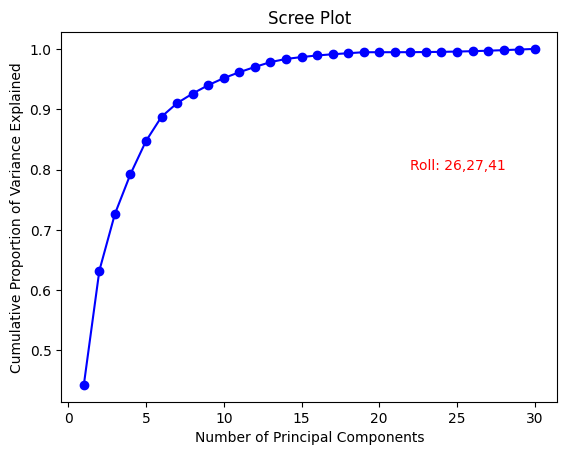

In [46]:
# Plot a scree plot to visualize how much variance is captured by which PC
cumulative_variance = np.cumsum(proportion_of_variance)                                               # sum
plt.plot(range(1, len(proportion_of_variance) + 1), cumulative_variance, marker='o', color='blue')    # range(1 to 30) on x axis, cummulative pov on y axis
varlegend= "Roll: 26,27,41"
plt.text(22,0.8,varlegend,color='red')                                                               # plot(x_position,y_position,varlegend,color)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Proportion of Variance Explained')
plt.title('Scree Plot')
plt.show()

**STEP 6: Select the eigen vectors as needed to compute the final output** Formula: New data (Y) = Row feature vector * Row data

In [47]:
# Transpose data into row wise
transposed_X_train = np.transpose(X_train)
print("shape of transposed x train is",transposed_X_train.shape)
# Transpose eigen vectors into row wise for row feature vector
eigenvectors_transposed=np.transpose(eigenvectors)

shape of transposed x train is (30, 569)


In [68]:
# Dictionary to store the final Y(because we want to have multiple Y, each obtained by selecting our choice of combination of PC).
Y = {}
selected_components = [[0], [0, 1], [0,3], [2,3], [0,29]]                       # best PC, 2 best PCs, best+medium, medium+medium, best+worst
count=len(selected_components)

# Iterate over the selected components
for i in range (0,count):
  selected_eigenvectors = eigenvectors_transposed[selected_components[i]]       # select the combination of components from above list
  Y[i] = np.transpose(selected_eigenvectors @ transposed_X_train)               # projection
  print(Y[i].shape)

(569, 1)
(569, 2)
(569, 2)
(569, 2)
(569, 2)


In [73]:
# checking the nature of Y
print(type(Y))
print(Y.keys())
Y[1].shape
print(type(Y[1]))

<class 'dict'>
dict_keys([0, 1, 2, 3, 4])
<class 'pandas.core.frame.DataFrame'>


**STEP 7: Computing and visualizing covariance for the new data.**

In [49]:
# Dictionary to store all covariance matrices(obtained by selecting our choice of combination of PC).
new_covariance_matrices_dictionary = {}
for i in range(0, count):
  new_covariance_matrix = np.cov(Y[i], rowvar=False)
  new_covariance_matrices_dictionary[i] = new_covariance_matrix                               # Combination:
  print("*Covariance matrix shape for combination",i,"is", new_covariance_matrix.shape)       # 0=best PC, 1=2 best PCs, 2= best+medium PCs
  print("-->Covariance matrix:",new_covariance_matrices_dictionary[i])                        # 3=medium+medium PCs, 4= best+worst PCs

*Covariance matrix shape for combination 0 is ()
-->Covariance matrix: 13.30499079437456
*Covariance matrix shape for combination 1 is (2, 2)
-->Covariance matrix: [[1.33049908e+01 3.70282834e-15]
 [3.70282834e-15 5.70137460e+00]]
*Covariance matrix shape for combination 2 is (2, 2)
-->Covariance matrix: [[ 1.33049908e+01 -1.75133773e-15]
 [-1.75133773e-15  1.98412752e+00]]
*Covariance matrix shape for combination 3 is (2, 2)
-->Covariance matrix: [[ 2.82291016e+00 -5.00382208e-16]
 [-5.00382208e-16  1.98412752e+00]]
*Covariance matrix shape for combination 4 is (2, 2)
-->Covariance matrix: [[1.33049908e+01 6.35641774e-16]
 [6.35641774e-16 3.00256631e-02]]


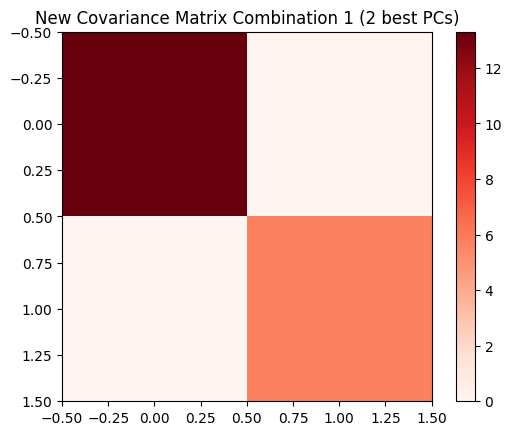

In [50]:
# Heatmap to visualize covariance matrix combination.
plt.imshow(new_covariance_matrices_dictionary[1], cmap='Reds', interpolation='nearest')  #instead of 'nearest', we can use 'bilinear','bicubic','spline16', 'spline36', 'hanning', 'hamming', 'hermite',etc..
plt.colorbar()
plt.title("New Covariance Matrix Combination 1 (2 best PCs)")
plt.show()

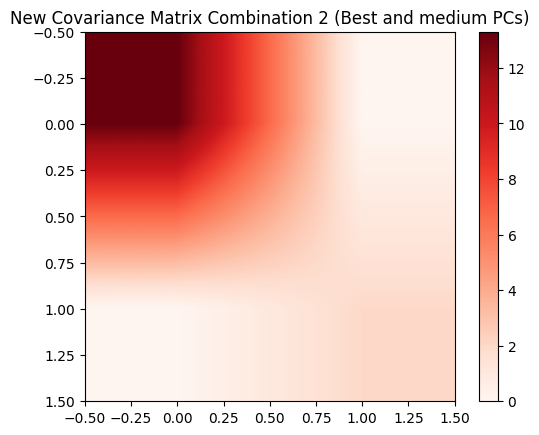

In [51]:
#lets try bilinear,pixel coloring is smoother(linear interpolation between 4 nearest data points)
plt.imshow(new_covariance_matrices_dictionary[2], cmap='Reds', interpolation='bilinear')
plt.colorbar()
plt.title("New Covariance Matrix Combination 2 (Best and medium PCs)")
plt.show()

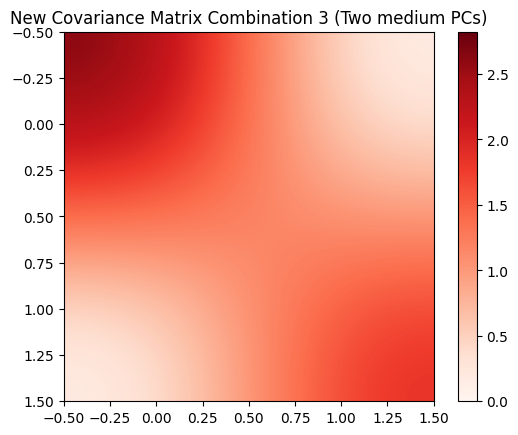

In [52]:
#lets try bicubic,pixel coloring is again smoother(linear interpolation based on 16 nearest data points)
plt.imshow(new_covariance_matrices_dictionary[3], cmap='Reds', interpolation='bicubic')
plt.colorbar()
plt.title("New Covariance Matrix Combination 3 (Two medium PCs)")
plt.show()

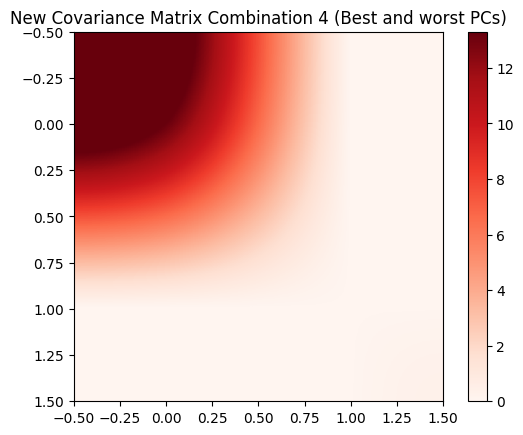

In [53]:
#lets try spline16,pixel coloring is even smoother(16 degree of polynomial used for interpolation, for flexibility)
plt.imshow(new_covariance_matrices_dictionary[4], cmap='Reds', interpolation='spline16')
plt.colorbar()
plt.title("New Covariance Matrix Combination 4 (Best and worst PCs)")
plt.show()

**STEP 8:Visualize the final output**

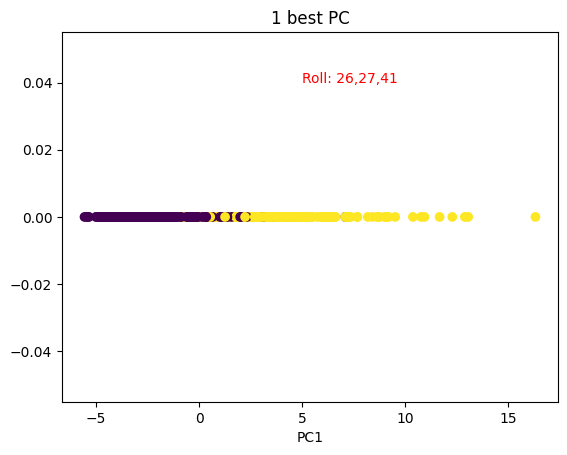

In [87]:
#Combination 0 = Y[0] = Best PC
#plt.ylim(-10,10)
#plt.xlim(-10,10)
varlegend= "Roll: 26,27,41"
plt.text(5,0.04,varlegend,color='red')
plt.title("1 best PC")
plt.xlabel('PC1')
plt.scatter(Y[0], np.zeros_like(Y[0]), c=y_train)   # colors = based on y_train


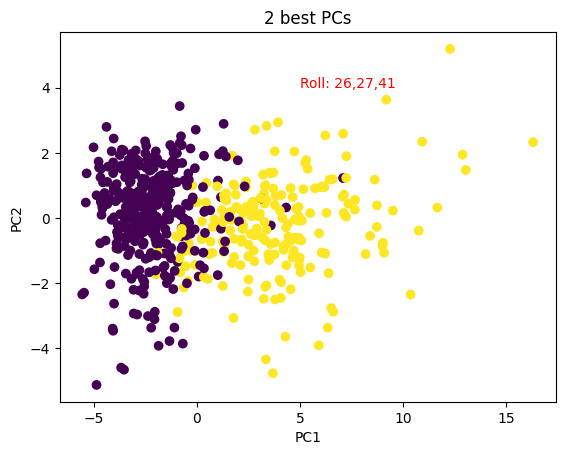

In [105]:
# Combination 1 = Y[1] = 2 best PCs
#plt.ylim(-3,3)
#plt.xlim(-3,3)
varlegend= "Roll: 26,27,41"
plt.text(5,4,varlegend,color='red')
plt.title("2 best PCs")
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.scatter(Y[2].iloc[:, 0], Y[2].iloc[:, 1], c=y_train)    # iloc used to access data

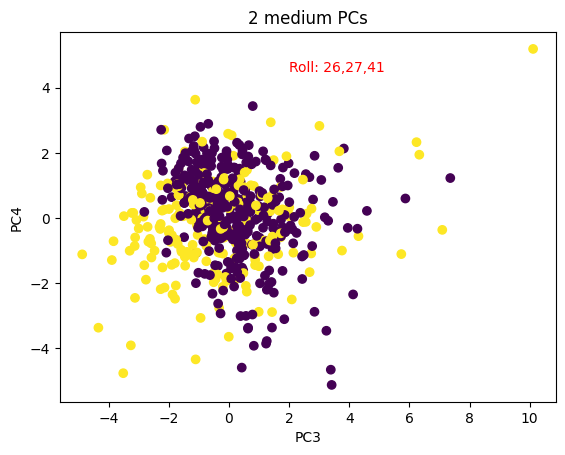

In [108]:
# Combination 3 = Y[3] = 2 medium PCs
#plt.ylim(-3,3)
#plt.xlim(-3,3)
varlegend= "Roll: 26,27,41"
plt.text(2,4.5,varlegend,color='red')
plt.title("2 medium PCs")
plt.xlabel('PC3')
plt.ylabel('PC4')
plt.scatter(Y[3].iloc[:,0],Y[3].iloc[:,1],c=y_train)

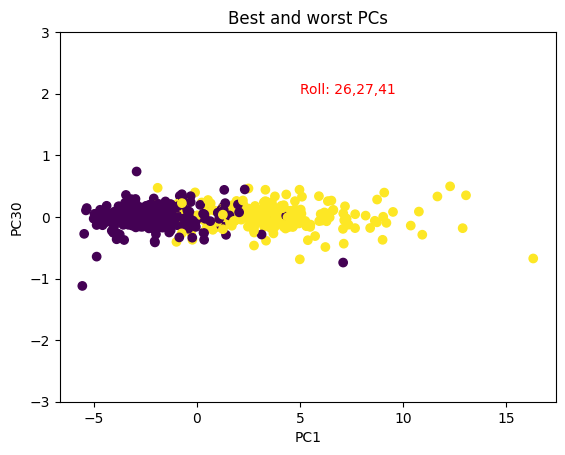

In [114]:
# Combination 4 = Y[4] = Best and worst PCs
plt.ylim(-3,3)
#plt.xlim(-3,3)
varlegend= "Roll: 26,27,41"
plt.text(5,2,varlegend,color='red')
plt.title("Best and worst PCs")
plt.xlabel('PC1')
plt.ylabel('PC30')
plt.scatter(Y[4].iloc[:,0],Y[4].iloc[:,1],c=y_train)

**STEP 9: PCA using Library**

In [115]:
from sklearn.decomposition import PCA
# Create instances of PCA with the desired number of components. (pca1 = 2components. pca2=so as to retain 95% info)
pca1 = PCA(n_components=2)
pca2 = PCA(0.95)

# Fit the PCA model to the data and transform the data
reduced_data1 = pca1.fit_transform(X_train)
reduced_data2 = pca2.fit_transform(X_train)

# Print the shape of the reduced data
print("Shape of reduced data:", reduced_data1.shape)
print("reduced through first",reduced_data1)
print("Shape of reduced data:", reduced_data2.shape)
print("reduced through second",reduced_data2)

Shape of reduced data: (569, 2)
reduced through first [[ 9.19283683  1.94858307]
 [ 2.3878018  -3.76817174]
 [ 5.73389628 -1.0751738 ]
 ...
 [ 1.25617928 -1.90229671]
 [10.37479406  1.67201011]
 [-5.4752433  -0.67063679]]
Shape of reduced data: (569, 10)
reduced through second [[ 9.19283683  1.94858307 -1.12316616 ... -0.39840723 -0.15711836
  -0.87740188]
 [ 2.3878018  -3.76817174 -0.52929269 ...  0.24098846 -0.71190482
   1.10699494]
 [ 5.73389628 -1.0751738  -0.55174759 ...  0.09737374  0.02406564
   0.4542754 ]
 ...
 [ 1.25617928 -1.90229671  0.56273053 ...  0.34188704  0.39391682
   0.52087738]
 [10.37479406  1.67201011 -1.87702933 ... -0.28023861 -0.54203454
  -0.08929612]
 [-5.4752433  -0.67063679  1.49044308 ...  1.04635352  0.37410111
  -0.04772557]]


Here it can be seen that to retain 95% info, 10 principle components are required

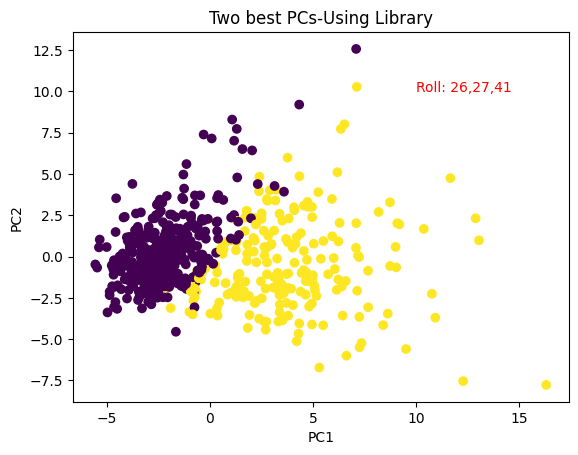

In [118]:
# Visualize the output for the first PCA done by library
#plt.ylim(-3,3)
#plt.xlim(-3,3)
varlegend= "Roll: 26,27,41"
plt.text(10,10,varlegend,color='red')
plt.title("Two best PCs-Using Library")
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.scatter(reduced_data1.T[0],reduced_data1.T[1], c= y_train) # After applying transform method of PCA,Each row was represented as a sample. So need to transpose.

<Figure size 640x480 with 0 Axes>

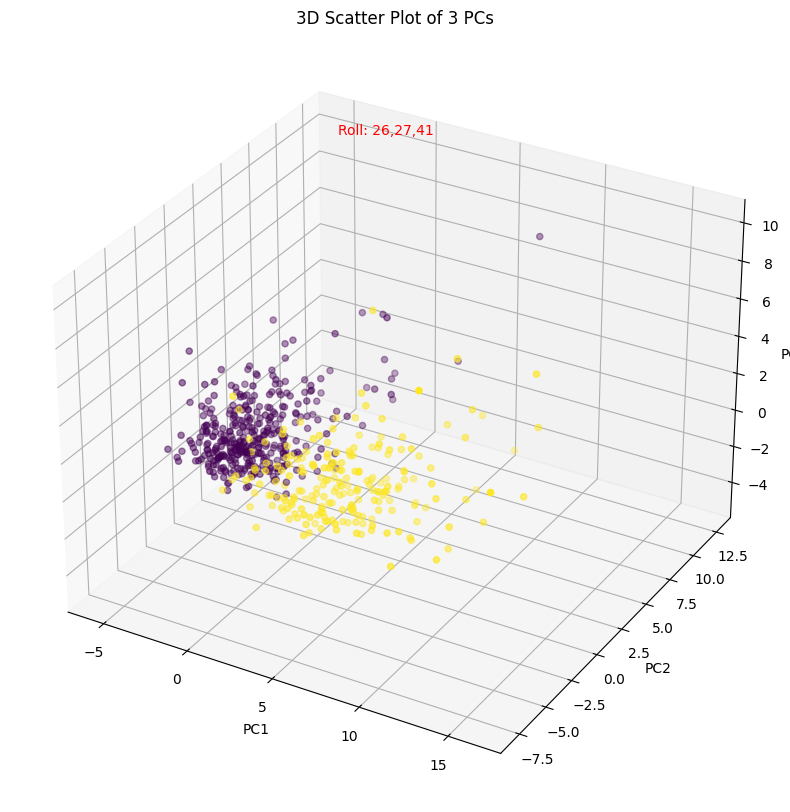

In [121]:
# For the 2nd PCA done by library(to retain 95% info), 10 components were required! We will try to plot 3d scatter plot to visualize.
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
varlegend= "Roll: 26,27,41"
ax.text(-5,12.5,10,varlegend,color='red')                                       # 3d coordinates required to specify the legend position
ax.scatter(reduced_data2.T[0],reduced_data2.T[1],reduced_data2.T[2],c=y_train)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('3D Scatter Plot of 3 PCs')
plt.show()

For the next step, we can train a model and compare the performance to see the impact of PCA we did so far.